# Project Name - “Data Science Job Market Analysis Across Multiple Job Portals”

##### Project Type : Web Scraping & EDA
##### Contribution : Individual
##### Created by: Bhanu Sai Prakash Bandaru

# Real-Time Scenario (Data-Driven)

Ramesh is a non-IT background professional who wants to transition into a Data Science career.

He searches for jobs on major job portals:
- Naukri
- Indeed
- LinkedIn

Each portal displays thousands of job postings, but only within its own ecosystem.

---

## The Confusion Ramesh Faces (Before Analysis)

While browsing individual job portals, Ramesh struggles to clearly understand:

- Which roles (Data Analyst, Data Scientist, ML Engineer) actually have the highest demand.
- Whether the job market is entry-level friendly or biased toward experienced professionals.
- Which technical skills (Python, Machine Learning, SQL, Data Analytics) are consistently required across roles.
- Which cities genuinely offer more data science job opportunities.
- Whether salary information is commonly disclosed or mostly hidden.
- How hiring patterns differ across Naukri, Indeed, and LinkedIn.

Because each portal shows fragmented and inconsistent information, Ramesh finds it difficult to:
- Compare roles across platforms.
- Identify real demand trends.
- Understand salary transparency.
- Decide where to focus his learning and job search.

As a result, Ramesh ends up making career decisions based on assumptions instead of data.

---

## How This Project Addresses the Problem

This project resolves Ramesh’s confusion by:

- Collecting and merging job postings from multiple job portals into a single dataset.
- Cleaning and standardizing unstructured job market data.
- Categorizing roles, experience levels, locations, and skills for meaningful analysis.
- Using visualizations to uncover demand patterns across roles, skills, cities, experience levels, and portals.
- Applying statistical hypothesis testing to validate whether observed patterns are significant.

---

## Outcome for Ramesh

Instead of relying on isolated job listings, Ramesh now gains a consolidated, data-driven view of the job market.

He can clearly understand:
- Which roles are genuinely in demand.
- Which skills are non-negotiable across roles.
- Which cities offer stronger job opportunities.
- How salary transparency varies by role, experience, and portal.
- How different job portals emphasize different hiring patterns.

This enables Ramesh to plan his career transition strategically, focus on the right skills, target high-opportunity locations, and make informed decisions backed by data rather than guesswork.


![Screenshot](image.png)

# Problem Statement

Job seekers and career planners struggle to understand current hiring trends in the data science job market because job-related information is scattered across multiple platforms such as Naukri, Indeed, and LinkedIn.  
Each portal presents data in different formats and emphasizes different aspects of job postings, making it difficult to obtain a unified and accurate view of job roles, required skills, preferred locations, and overall demand.

As a result, candidates often rely on assumptions or incomplete information when making career decisions.  
This project addresses the problem by collecting job postings from multiple portals, merging them into a single dataset, and performing exploratory data analysis (EDA) to uncover meaningful patterns and trends in the data science job market.

---

# Business Problem Statement

Organizations such as career training institutes, recruitment agencies, and workforce planning teams require reliable insights into the job market to design effective training programs, guide job seekers, and align hiring strategies with market demand.  
However, relying on data from a single job portal provides only a partial and sometimes misleading view of the market.

The absence of a consolidated view across multiple job portals makes it challenging for businesses to understand true demand for roles, skills, experience levels, and locations.  
By aggregating and analyzing job postings from multiple platforms, this project provides a comprehensive, data-driven understanding of the data science job market, enabling better strategic and career-related decision-making.

---

# Business Objectives

## Primary Objective

To analyze data science job postings collected from multiple job portals and identify key trends related to job roles, skills, locations, experience levels, and hiring demand.

## Specific Business Objectives

- To identify the most in-demand data science job roles across different job portals.
- To analyze city-wise distribution of job opportunities in the data science domain.
- To determine the most frequently required technical skills mentioned in job postings.
- To compare hiring activity across Naukri, Indeed, and LinkedIn.
- To understand how job postings are distributed across different experience levels.
- To support data-driven career planning for job seekers and training institutions.


## Lets's Begin

In [4]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd

### Naukri Data Science Jobs

In [14]:
joblist = []

In [15]:
def extract(page, driver):
    """
    Fetches a Naukri job listing page and returns a BeautifulSoup object.
    """
    url = f"https://www.naukri.com/data-science-jobs-{page}?k=data%20science&nignbevent_src=jobsearchDeskGNB"
    
    driver.get(url)
    time.sleep(3)
    
    soup = BeautifulSoup(driver.page_source, "html.parser")
    return soup


In [16]:
def transform(soup):
    """
    Extracts job details from soup and appends them to joblist.
    """
    divs = soup.find_all('div', {'class': 'srp-jobtuple-wrapper'})
    
    for job in divs:
        try:
            title = job.find('a', {'class': 'title'}).text.strip()
            link = job.find('a').get('href')

            company_tag = job.find('span', {'class': 'comp-dtls-wrap'})
            company = company_tag.find('a').get('title').strip() if company_tag else "Not mentioned"

            experience = job.find('span', {'class': 'expwdth'}).get('title').strip()

            salary_tag = job.find('span', {'class': 'ni-job-tuple-icon ni-job-tuple-icon-srp-rupee sal'})
            salary = salary_tag.find('span').get('title').strip() if salary_tag else "Not disclosed"

            location = job.find('span', {'class': 'locWdth'}).get('title').strip()

            skills_tag = job.find('ul', {'class': 'tags-gt'})
            skills = [skill.text.strip() for skill in skills_tag.find_all('li')] if skills_tag else []

            post_date = job.find('span', {'class': 'job-post-day'}).text.strip()

            joblist.append({
                'Title': title,
                'Job_Link': link,
                'Company': company,
                'Experience': experience,
                'Salary': salary,
                'Location': location,
                'Skills': skills,
                'Job_Post_Date': post_date
            })

        except Exception:
            continue


In [17]:
# Check the number of jobs extracted.
driver = webdriver.Chrome()

for i in range(1, 50):
    soup = extract(i, driver)
    transform(soup)

driver.quit()


In [18]:
# Load into a pandas dataframe.
df_naukri = pd.DataFrame(joblist)

df_naukri

,Title,Job_Link,Company,Experience,Salary,Location,Skills,Job_Post_Date
0,Analyst - Data Science,https://www.naukri.com/job-listings-analyst-da...,AMERICAN EXPRESS,0-3 Yrs,Not disclosed,Gurugram,"[Career development, Finance, Underwriting, Ma...",3 days ago
1,Data Science Trainer,https://www.naukri.com/job-listings-data-scien...,INFOMETIZ,2-4 Yrs,5-15 Lacs PA,"Hyderabad, Bengaluru","[Data Science, Data Analytics, Artificial Inte...",1 week ago
2,Senior Manager - Data Science & Analytics,https://www.naukri.com/job-listings-senior-man...,eBay,11-15 Yrs,Not disclosed,Bengaluru,"[Bidding, data science, Analytical, Instrument...",6 days ago
3,Sr. Manager - Data Science (IC Role),https://www.naukri.com/job-listings-sr-manager...,Visa,1-12 Yrs,Not disclosed,Bengaluru,"[Automation, Data modeling, Machine learning, ...",Few hours ago
4,"Analyst, Data Science",https://www.naukri.com/job-listings-analyst-da...,Diageo,2-3 Yrs,Not disclosed,Bengaluru,"[data science, s3, python, data analytics, nat...",4 days ago
...,...,...,...,...,...,...,...,...
948,EY - GDS Consulting - AI And DATA - Data Analy...,https://www.naukri.com/job-listings-ey-gds-con...,EY,5-8 Yrs,Not disclosed,Hyderabad,"[Data Analyst, Tableau, Numpy, Azure, Power BI...",2 weeks ago
949,Senior Data Analyst,https://www.naukri.com/job-listings-senior-dat...,Clarkson Research Services,6-11 Yrs,Not disclosed,Gurugram,"[Power Bi, JSON, Data Analytics, SQL, Python, ...",3 days ago
950,Senior Data Analyst,https://www.naukri.com/job-listings-senior-dat...,Fabel Services,6-10 Yrs,18-25 Lacs PA,Gurugram(Udyog Vihar Phase 4),"[Power Bi, SQL, Python, Analysis, Data Analysi...",5 days ago
951,Senior Data Analyst,https://www.naukri.com/job-listings-senior-dat...,Difinity Digital,3-6 Yrs,Not disclosed,Kochi,"[Power Bi, Data Analytics, Python, Analytics, ...",6 days ago


In [19]:
# Convert the list under 'Skills' to string.
df_naukri['Skills'] = df_naukri['Skills'].apply(lambda x: ', '.join(x))

In [20]:
# Add a column to identify the Job site which in this case is 'Naukri Jobs'.
df_naukri['Job_Site_Name'] = 'Naukri Jobs'

df_naukri.head()

,Title,Job_Link,Company,Experience,Salary,Location,Skills,Job_Post_Date,Job_Site_Name
0,Analyst - Data Science,https://www.naukri.com/job-listings-analyst-da...,AMERICAN EXPRESS,0-3 Yrs,Not disclosed,Gurugram,"Career development, Finance, Underwriting, Mac...",3 days ago,Naukri Jobs
1,Data Science Trainer,https://www.naukri.com/job-listings-data-scien...,INFOMETIZ,2-4 Yrs,5-15 Lacs PA,"Hyderabad, Bengaluru","Data Science, Data Analytics, Artificial Intel...",1 week ago,Naukri Jobs
2,Senior Manager - Data Science & Analytics,https://www.naukri.com/job-listings-senior-man...,eBay,11-15 Yrs,Not disclosed,Bengaluru,"Bidding, data science, Analytical, Instrumenta...",6 days ago,Naukri Jobs
3,Sr. Manager - Data Science (IC Role),https://www.naukri.com/job-listings-sr-manager...,Visa,1-12 Yrs,Not disclosed,Bengaluru,"Automation, Data modeling, Machine learning, A...",Few hours ago,Naukri Jobs
4,"Analyst, Data Science",https://www.naukri.com/job-listings-analyst-da...,Diageo,2-3 Yrs,Not disclosed,Bengaluru,"data science, s3, python, data analytics, natu...",4 days ago,Naukri Jobs


In [21]:
# Save the data as a .csv file.
df_naukri.to_csv('naukri_jobs_dataset.csv')

### Indeed Data Science Jobs

In [22]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd

In [23]:
joblist = []

In [30]:
def extract(page, driver):
    """
    Fetches an Indeed job listing page and returns a BeautifulSoup object.

    Args:
        page (int): Pagination offset (0, 10, 20, ...)

    Returns:
        BeautifulSoup object
    """

    # Construct Indeed URL with pagination
    url = f"https://in.indeed.com/jobs?q=data+scientist&sort=date&start={page}"

    # Load the page in browser
    driver.get(url)

    # Wait for page to load completely
    time.sleep(3)

    # Convert page source into BeautifulSoup object
    soup = BeautifulSoup(driver.page_source, "html.parser")

    return soup

In [1]:
def transform(soup):
    cards = soup.select("div.job_seen_beacon")

    for job in cards:
        title_tag = job.select_one("h2.jobTitle span")
        link_tag = job.select_one("h2.jobTitle a")

        if not title_tag or not link_tag:
            continue

        company_tag = job.select_one("span.companyName")
        location_tag = job.select_one("div.companyLocation")
        salary_tag = job.select_one("div.salary-snippet")
        date_tag = job.select_one("span.date")

        joblist.append({
            "Title": title_tag.text.strip(),
            "Job_Link": "https://in.indeed.com" + link_tag["href"],
            "Company": company_tag.text.strip() if company_tag else None,
            "Experience": None,
            "Salary": salary_tag.text.strip() if salary_tag else None,
            "Location": location_tag.text.strip() if location_tag else None,
            "Skills": None,
            "Job_Post_Date": date_tag.text.strip() if date_tag else None
        })


In [36]:
# Check the number of jobs extracted.
driver = webdriver.Chrome()

for i in range(1,50,10):
    soup = extract(i, driver)
    transform(soup)

driver.quit()

In [37]:
# Load into a pandas dataframe.
df_indeed = pd.DataFrame(joblist)
df_indeed

,Title,Job_Link,Company,Experience,Salary,Location,Skills,Job_Post_Date
0,Analyst Data Science- LII Commercial and Speci...,https://in.indeed.com/rc/clk?jk=46e3b49b60ee8e...,Not disclosed,Not available,Not disclosed,Not mentioned,[Full-time +1],Not mentioned
1,Machine Learning Engineer / Data Scientist,https://in.indeed.com/rc/clk?jk=8d6711d88df240...,Not disclosed,Not available,Not disclosed,Not mentioned,[Full-time],Not mentioned
2,Staff Data Scientist,https://in.indeed.com/rc/clk?jk=1641c43291e026...,Not disclosed,Not available,Not disclosed,Not mentioned,[],Not mentioned
3,AI/ML Engineer,https://in.indeed.com/rc/clk?jk=9ae7b67a820f25...,Not disclosed,Not available,Not disclosed,Not mentioned,"[Full-time, Health insurance, Flexible schedule]",Not mentioned
4,Lead Data Engineer,https://in.indeed.com/rc/clk?jk=5c6dc3723f1041...,Not disclosed,Not available,Not disclosed,Not mentioned,[Full-time],Not mentioned
...,...,...,...,...,...,...,...,...
59,"Cyber Security , AI & Data Science Trainer",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,None,None,None,None,None,None
60,AI Engineer,https://in.indeed.com/rc/clk?jk=7e1a6fdfc2b5ba...,None,None,None,None,None,None
61,Data Science Intern,https://in.indeed.com/rc/clk?jk=09c906dfc01a69...,None,None,None,None,None,None
62,AI Product Manager / Product Owner / Sr. Produ...,https://in.indeed.com/rc/clk?jk=8041a12ace990c...,None,None,None,None,None,None


In [106]:
df_indeed = pd.read_csv(r"C:\Users\Dell\Downloads\indeed_scraped_dataset.csv")
df_indeed

,Title,Company,Experience,Salary,Location,Skills,Job_Post_Date,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Associate Staff Engineer (Data Science),Nagarro,5-7 Yrs,Not disclosed,"Hybrid - Hyderabad, India","['NLP', 'Machine Learning on Azure', 'Data sci...",1 week ago,NaN,NaN,NaN,NaN,NaN,NaN
1,Data Science Analytics Specialist - Data Science,Accenture,2-4 Yrs,Not disclosed,"Mumbai, Hyderabad","['python', 'artificial intelligence', 'data sc...",3+ weeks ago,NaN,NaN,NaN,NaN,NaN,NaN
2,S2R- DNA - Python ML/Data Science Professional,Infosys,5-7 Yrs,Not disclosed,Bengaluru,"['python', 'domain knowledge', 'team managemen...",1 day ago,NaN,NaN,NaN,NaN,NaN,NaN
3,Data Science Analyst,Naukri,1-5 Yrs,Not disclosed,Hybrid - Bengaluru,"['Machine Learning', 'Ml Algorithms', 'Python'...",5 days ago,NaN,NaN,NaN,NaN,NaN,NaN
4,Sr. Manager-Data Science-HR Analytics-Immediat...,Genpact,9-14 Yrs,Not disclosed,Hyderabad,"['Data Science', 'Artificial Intelligence', 'M...",3 days ago,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,Data Scientist,LTIMindtree,5-10 Yrs,Not disclosed,"Hybrid - Hyderabad, Bengaluru, Mumbai (All Areas)",[],3+ weeks ago,NaN,NaN,NaN,NaN,NaN,NaN
1699,Data Scientist Lead,Han Digital Solution,8-13 Yrs,Not disclosed,"Hyderabad, Pune, Bengaluru",[],3+ weeks ago,NaN,NaN,NaN,NaN,NaN,NaN
1700,I&F Decision Sci Practitioner Sr Analyst,Accenture,5-8 Yrs,Not disclosed,"Mumbai, Hyderabad",[],3+ weeks ago,NaN,NaN,NaN,NaN,NaN,NaN
1701,Data Governance - Senior Analyst,Evalueserve,3-8 Yrs,Not disclosed,Gurugram,[],3+ weeks ago,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
df_indeed.drop(columns=['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12'],inplace=True)

In [108]:
df_indeed

,Title,Company,Experience,Salary,Location,Skills,Job_Post_Date
0,Associate Staff Engineer (Data Science),Nagarro,5-7 Yrs,Not disclosed,"Hybrid - Hyderabad, India","['NLP', 'Machine Learning on Azure', 'Data sci...",1 week ago
1,Data Science Analytics Specialist - Data Science,Accenture,2-4 Yrs,Not disclosed,"Mumbai, Hyderabad","['python', 'artificial intelligence', 'data sc...",3+ weeks ago
2,S2R- DNA - Python ML/Data Science Professional,Infosys,5-7 Yrs,Not disclosed,Bengaluru,"['python', 'domain knowledge', 'team managemen...",1 day ago
3,Data Science Analyst,Naukri,1-5 Yrs,Not disclosed,Hybrid - Bengaluru,"['Machine Learning', 'Ml Algorithms', 'Python'...",5 days ago
4,Sr. Manager-Data Science-HR Analytics-Immediat...,Genpact,9-14 Yrs,Not disclosed,Hyderabad,"['Data Science', 'Artificial Intelligence', 'M...",3 days ago
...,...,...,...,...,...,...,...
1698,Data Scientist,LTIMindtree,5-10 Yrs,Not disclosed,"Hybrid - Hyderabad, Bengaluru, Mumbai (All Areas)",[],3+ weeks ago
1699,Data Scientist Lead,Han Digital Solution,8-13 Yrs,Not disclosed,"Hyderabad, Pune, Bengaluru",[],3+ weeks ago
1700,I&F Decision Sci Practitioner Sr Analyst,Accenture,5-8 Yrs,Not disclosed,"Mumbai, Hyderabad",[],3+ weeks ago
1701,Data Governance - Senior Analyst,Evalueserve,3-8 Yrs,Not disclosed,Gurugram,[],3+ weeks ago


In [109]:
import ast

In [110]:
def clean_skills(x):
    # If x is a string that looks like a list, convert it
    if isinstance(x, str):
        try:
            x = ast.literal_eval(x)
        except:
            return x.strip()
    
    # If x is now a list, join it
    if isinstance(x, list):
        return ", ".join([skill.strip() for skill in x])
    
    return ""

In [111]:
df_indeed['Skills'] = df_indeed['Skills'].apply(clean_skills)

In [112]:
df_indeed[['Skills']].head()

,Skills
0,"NLP, Machine Learning on Azure, Data science o..."
1,"python, artificial intelligence, data science,..."
2,"python, domain knowledge, team management, pri..."
3,"Machine Learning, Ml Algorithms, Python, SQL, ..."
4,"Data Science, Artificial Intelligence, Machine..."


In [120]:
# Add a column to identify the Job site which in this case is 'Indeed Jobs'.
df_indeed['Job_Site_Name'] = 'Indeed Jobs'

df_indeed

,Title,Company,Experience,Salary,Location,Skills,Job_Post_Date,Job_Site_Name
0,Associate Staff Engineer (Data Science),Nagarro,5-7 Yrs,Not disclosed,"Hybrid - Hyderabad, India","NLP, Machine Learning on Azure, Data science o...",1 week ago,Indeed Jobs
1,Data Science Analytics Specialist - Data Science,Accenture,2-4 Yrs,Not disclosed,"Mumbai, Hyderabad","python, artificial intelligence, data science,...",3+ weeks ago,Indeed Jobs
2,S2R- DNA - Python ML/Data Science Professional,Infosys,5-7 Yrs,Not disclosed,Bengaluru,"python, domain knowledge, team management, pri...",1 day ago,Indeed Jobs
3,Data Science Analyst,Naukri,1-5 Yrs,Not disclosed,Hybrid - Bengaluru,"Machine Learning, Ml Algorithms, Python, SQL, ...",5 days ago,Indeed Jobs
4,Sr. Manager-Data Science-HR Analytics-Immediat...,Genpact,9-14 Yrs,Not disclosed,Hyderabad,"Data Science, Artificial Intelligence, Machine...",3 days ago,Indeed Jobs
...,...,...,...,...,...,...,...,...
1698,Data Scientist,LTIMindtree,5-10 Yrs,Not disclosed,"Hybrid - Hyderabad, Bengaluru, Mumbai (All Areas)",,3+ weeks ago,Indeed Jobs
1699,Data Scientist Lead,Han Digital Solution,8-13 Yrs,Not disclosed,"Hyderabad, Pune, Bengaluru",,3+ weeks ago,Indeed Jobs
1700,I&F Decision Sci Practitioner Sr Analyst,Accenture,5-8 Yrs,Not disclosed,"Mumbai, Hyderabad",,3+ weeks ago,Indeed Jobs
1701,Data Governance - Senior Analyst,Evalueserve,3-8 Yrs,Not disclosed,Gurugram,,3+ weeks ago,Indeed Jobs


In [121]:
df_indeed.to_csv('indeed_jobs_dataset.csv')

### LinkedIn Data Science Jobs

In [6]:
def extract(page):
    '''
    This function is used to extract the webpage of www.linkedin.com/jobs and convert it to the soup object using BeautifulSoup.
    
    Args: 
    int: Page Number for number of pages to extract.
    
    Returns:
    A BeautifulSoup object.
    '''
    
    # Fetch the url and the page number
    url = f"https://www.linkedin.com/jobs/search?keywords=Data%20Scientist&location=India&geoId=102713980&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum={page}"
    
    driver = webdriver.Chrome()
    driver.get(url)
    time.sleep(3)
    
    # Extract the web page
    soup = BeautifulSoup(driver.page_source,'html5lib')

    # Close the driver
    driver.close()
    
    return soup 


In [9]:
def transform(soup):
    '''
    This function is used to extract the job title, job link, company name, experience, salary, location, skills and job post date for each job and create a dictionary.
    
    Args:
    The BeautifulSoup object returned by the 'extract(page)' function.
    
    Returns:
    A list of job dictionaries named 'joblist'.
    '''
    
    divs = soup.find_all('div', {'class' : 'base-card'})
              
    for job in divs:
        # Job Title
        title = job.find('span', {'class' : 'sr-only'}).text.strip()
                        
        # Job Link
        link = job.find('a').get('href')
                
        # Company name
        # Use try-except to catch instances where company name is not mentioned.
        company = job.find('a', {'class' : 'hidden-nested-link'}).text.strip()
              
        # Experience
        # Experience is not explicity given under a separate heading on the job listing page.
        experience = 'Not available'
        
        # Salary
        # Salary is not explicity given under a separate heading on the job listing page.
        salary = 'Not available'
        
        # Job Location
        location = job.find('span', {'class' : 'job-search-card__location'}).text.strip()
                
        # Skills
        # Skills is not explicity given under a separate heading on the job listing page.
        skills = 'Not available'
                    
        # Job Post Date        
        post_date = job.find('time').text.strip()
        
        # Create a dictionary to store all the values.
        job = {
            'Title': title,
            'Job_Link': link,
            'Company': company,
            'Experience': experience,
            'Salary': salary,
            'Location': location,
            'Skills': skills,
            'Job_Post_Date': post_date
        }
        
        # Create a list of dictionaries for each job.
        joblist.append(job)
        
    return joblist
    

In [10]:
# Check the number of jobs extracted.
joblist = []
for i in range(70):
    content = extract(i)
    transform(content)

#print(len(joblist1))

In [11]:
# Load into a pandas dataframe.
df_linkedin = pd.DataFrame(joblist)

# Check the first 5 rows.
df_linkedin

,Title,Job_Link,Company,Experience,Salary,Location,Skills,Job_Post_Date
0,Data Science INTERN,https://in.linkedin.com/jobs/view/data-science...,Microsoft,Not available,Not available,"Bengaluru, Karnataka, India",Not available,2 weeks ago
1,Python ML,https://in.linkedin.com/jobs/view/python-ml-at...,Infosys,Not available,Not available,"Hyderabad, Telangana, India",Not available,1 week ago
2,Applied Science,https://in.linkedin.com/jobs/view/applied-scie...,Microsoft,Not available,Not available,"Bengaluru, Karnataka, India",Not available,4 days ago
3,Machine Learning Engineer,https://in.linkedin.com/jobs/view/machine-lear...,Meril,Not available,Not available,"Bengaluru, Karnataka, India",Not available,2 weeks ago
4,Data Scientist,https://in.linkedin.com/jobs/view/data-scienti...,MakeMyTrip,Not available,Not available,"Bengaluru, Karnataka, India",Not available,4 days ago
...,...,...,...,...,...,...,...,...
4195,Data Scientist,https://in.linkedin.com/jobs/view/data-scienti...,Ikigai,Not available,Not available,"Bengaluru, Karnataka, India",Not available,2 months ago
4196,Software Engineer,https://in.linkedin.com/jobs/view/software-eng...,Microsoft,Not available,Not available,"Bengaluru, Karnataka, India",Not available,2 weeks ago
4197,Data Scientist,https://in.linkedin.com/jobs/view/data-scienti...,Pelatro,Not available,Not available,"Bengaluru, Karnataka, India",Not available,6 days ago
4198,Data Scientist – Supply Chain,https://in.linkedin.com/jobs/view/data-scienti...,Cisco,Not available,Not available,"Bengaluru, Karnataka, India",Not available,2 weeks ago


In [12]:
# Add a column to identify the Job site which in this case is 'LinkedIn Jobs'.
df_linkedin['Job_Site_Name'] = 'LinkedIn Jobs'

df_linkedin

,Title,Job_Link,Company,Experience,Salary,Location,Skills,Job_Post_Date,Job_Site_Name
0,Data Science INTERN,https://in.linkedin.com/jobs/view/data-science...,Microsoft,Not available,Not available,"Bengaluru, Karnataka, India",Not available,2 weeks ago,LinkedIn Jobs
1,Python ML,https://in.linkedin.com/jobs/view/python-ml-at...,Infosys,Not available,Not available,"Hyderabad, Telangana, India",Not available,1 week ago,LinkedIn Jobs
2,Applied Science,https://in.linkedin.com/jobs/view/applied-scie...,Microsoft,Not available,Not available,"Bengaluru, Karnataka, India",Not available,4 days ago,LinkedIn Jobs
3,Machine Learning Engineer,https://in.linkedin.com/jobs/view/machine-lear...,Meril,Not available,Not available,"Bengaluru, Karnataka, India",Not available,2 weeks ago,LinkedIn Jobs
4,Data Scientist,https://in.linkedin.com/jobs/view/data-scienti...,MakeMyTrip,Not available,Not available,"Bengaluru, Karnataka, India",Not available,4 days ago,LinkedIn Jobs
...,...,...,...,...,...,...,...,...,...
4195,Data Scientist,https://in.linkedin.com/jobs/view/data-scienti...,Ikigai,Not available,Not available,"Bengaluru, Karnataka, India",Not available,2 months ago,LinkedIn Jobs
4196,Software Engineer,https://in.linkedin.com/jobs/view/software-eng...,Microsoft,Not available,Not available,"Bengaluru, Karnataka, India",Not available,2 weeks ago,LinkedIn Jobs
4197,Data Scientist,https://in.linkedin.com/jobs/view/data-scienti...,Pelatro,Not available,Not available,"Bengaluru, Karnataka, India",Not available,6 days ago,LinkedIn Jobs
4198,Data Scientist – Supply Chain,https://in.linkedin.com/jobs/view/data-scienti...,Cisco,Not available,Not available,"Bengaluru, Karnataka, India",Not available,2 weeks ago,LinkedIn Jobs


In [23]:
# Limit the number of dataframe rows to 60 as the number of jobs extracted from naukri and indeed are also 60.
df_linkedin = df_linkedin.head(60)

In [14]:
len(df_linkedin)

60

In [146]:
# Save the data as a .csv file.
df_linkedin.to_csv('linkedin_jobs_dataset.csv')

# Merge all the three Dataframes into a single Dataframe

In [25]:
# Check the shape of all 3 dataframes before merging.
print(f"Naukri DF Shape: {df_naukri.shape}")
print(f"Indeed DF Shape: {df_indeed.shape}")
print(f"LinkedIn DF Shape: {df_linkedin.shape}")

Naukri DF Shape: (953, 10)
Indeed DF Shape: (1703, 9)
LinkedIn DF Shape: (914, 10)


In [26]:
# Since the shape of all 3 dataframes is equal, we can merge all of them into a single dataframe for further analysis.
df_jobs = pd.concat([df_naukri, df_indeed, df_linkedin], axis=0,ignore_index=True)

# Check the shape of the merged df.
df_jobs.shape

(3570, 10)

In [27]:
# Check the number of rows for each job site to confirm.
# df_jobs.value_counts("Job_Site_Name")
df_jobs['Job_Site_Name'].value_counts()

Job_Site_Name
Indeed Jobs      1703
Naukri Jobs       953
LinkedIn Jobs     914
Name: count, dtype: int64

In [167]:
# See the last 5 rows to check the index numbers.
df_jobs.tail()

,Title,Company,Experience,Salary,Location,Skills,Job_Post_Date,Job_Site_Name
3562,Machine Learning Engineer,Meril,Not available,Not available,"Bengaluru, Karnataka, India",Not available,1 week ago,LinkedIn
3563,**** *********,********* ***********,Not available,Not available,"********* *****, *********, *****",Not available,1 week ago,LinkedIn
3564,****** **,*******,Not available,Not available,"********* ****, *********, *****",Not available,16 hours ago,LinkedIn
3565,**** *********,***,Not available,Not available,"*********, *********, *****",Not available,6 days ago,LinkedIn
3566,**** *********,********** *******,Not available,Not available,"****, ***********, *****",Not available,5 days ago,LinkedIn


In [28]:
# Transfer the merged data to a .csv file.
df_jobs.to_csv("naukri_indeed_linkedin_jobs.csv", index=False)

In [29]:
import os
os.path.exists("naukri_indeed_linkedin_jobs.csv")

True

In [30]:
pd.read_csv("naukri_indeed_linkedin_jobs.csv").head()

,Unnamed: 0,Title,Job_Link,Company,Experience,Salary,Location,Skills,Job_Post_Date,Job_Site_Name
0,0,Analyst - Data Science,https://www.naukri.com/job-listings-analyst-da...,AMERICAN EXPRESS,0-3 Yrs,Not disclosed,Gurugram,"Career development, Finance, Underwriting, Mac...",3 days ago,Naukri Jobs
1,1,Data Science Trainer,https://www.naukri.com/job-listings-data-scien...,INFOMETIZ,2-4 Yrs,5-15 Lacs PA,"Hyderabad, Bengaluru","Data Science, Data Analytics, Artificial Intel...",1 week ago,Naukri Jobs
2,2,Senior Manager - Data Science & Analytics,https://www.naukri.com/job-listings-senior-man...,eBay,11-15 Yrs,Not disclosed,Bengaluru,"Bidding, data science, Analytical, Instrumenta...",6 days ago,Naukri Jobs
3,3,Sr. Manager - Data Science (IC Role),https://www.naukri.com/job-listings-sr-manager...,Visa,1-12 Yrs,Not disclosed,Bengaluru,"Automation, Data modeling, Machine learning, A...",Few hours ago,Naukri Jobs
4,4,"Analyst, Data Science",https://www.naukri.com/job-listings-analyst-da...,Diageo,2-3 Yrs,Not disclosed,Bengaluru,"data science, s3, python, data analytics, natu...",4 days ago,Naukri Jobs


In [51]:
df = pd.read_csv('naukri_indeed_linkedin_jobs.csv')
df

,Unnamed: 0,Title,Job_Link,Company,Experience,Salary,Location,Skills,Job_Post_Date,Job_Site_Name
0,0,Analyst - Data Science,https://www.naukri.com/job-listings-analyst-da...,AMERICAN EXPRESS,0-3 Yrs,Not disclosed,Gurugram,"Career development, Finance, Underwriting, Mac...",3 days ago,Naukri Jobs
1,1,Data Science Trainer,https://www.naukri.com/job-listings-data-scien...,INFOMETIZ,2-4 Yrs,5-15 Lacs PA,"Hyderabad, Bengaluru","Data Science, Data Analytics, Artificial Intel...",1 week ago,Naukri Jobs
2,2,Senior Manager - Data Science & Analytics,https://www.naukri.com/job-listings-senior-man...,eBay,11-15 Yrs,Not disclosed,Bengaluru,"Bidding, data science, Analytical, Instrumenta...",6 days ago,Naukri Jobs
3,3,Sr. Manager - Data Science (IC Role),https://www.naukri.com/job-listings-sr-manager...,Visa,1-12 Yrs,Not disclosed,Bengaluru,"Automation, Data modeling, Machine learning, A...",Few hours ago,Naukri Jobs
4,4,"Analyst, Data Science",https://www.naukri.com/job-listings-analyst-da...,Diageo,2-3 Yrs,Not disclosed,Bengaluru,"data science, s3, python, data analytics, natu...",4 days ago,Naukri Jobs
...,...,...,...,...,...,...,...,...,...,...
3565,909,Machine Learning Engineer,https://in.linkedin.com/jobs/view/machine-lear...,Meril,Not available,Not available,"Bengaluru, Karnataka, India",Not available,1 week ago,LinkedIn Jobs
3566,910,**** *********,https://in.linkedin.com/jobs/view/data-scienti...,********* ***********,Not available,Not available,"********* *****, *********, *****",Not available,1 week ago,LinkedIn Jobs
3567,911,****** **,https://in.linkedin.com/jobs/view/python-ml-at...,*******,Not available,Not available,"********* ****, *********, *****",Not available,16 hours ago,LinkedIn Jobs
3568,912,**** *********,https://in.linkedin.com/jobs/view/data-scienti...,***,Not available,Not available,"*********, *********, *****",Not available,6 days ago,LinkedIn Jobs


In [59]:
#df.drop(columns=['Unnamed: 0'],inplace=True)
df.drop(columns=['Job_Link'],inplace=True)

In [60]:
df

,Title,Company,Experience,Salary,Location,Skills,Job_Post_Date,Job_Site_Name
0,Analyst - Data Science,AMERICAN EXPRESS,0-3 Yrs,Not disclosed,Gurugram,"Career development, Finance, Underwriting, Mac...",3 days ago,Naukri Jobs
1,Data Science Trainer,INFOMETIZ,2-4 Yrs,5-15 Lacs PA,"Hyderabad, Bengaluru","Data Science, Data Analytics, Artificial Intel...",1 week ago,Naukri Jobs
2,Senior Manager - Data Science & Analytics,eBay,11-15 Yrs,Not disclosed,Bengaluru,"Bidding, data science, Analytical, Instrumenta...",6 days ago,Naukri Jobs
3,Sr. Manager - Data Science (IC Role),Visa,1-12 Yrs,Not disclosed,Bengaluru,"Automation, Data modeling, Machine learning, A...",Few hours ago,Naukri Jobs
4,"Analyst, Data Science",Diageo,2-3 Yrs,Not disclosed,Bengaluru,"data science, s3, python, data analytics, natu...",4 days ago,Naukri Jobs
...,...,...,...,...,...,...,...,...
3565,Machine Learning Engineer,Meril,Not available,Not available,"Bengaluru, Karnataka, India",Not available,1 week ago,LinkedIn Jobs
3566,**** *********,********* ***********,Not available,Not available,"********* *****, *********, *****",Not available,1 week ago,LinkedIn Jobs
3567,****** **,*******,Not available,Not available,"********* ****, *********, *****",Not available,16 hours ago,LinkedIn Jobs
3568,**** *********,***,Not available,Not available,"*********, *********, *****",Not available,6 days ago,LinkedIn Jobs


In [61]:
df.shape


(3570, 8)

In [64]:
df = df.drop_duplicates(subset=['Title', 'Company', 'Location'])

In [66]:
text_cols = ['Title', 'Company', 'Location', 'Skills', 'Job_Site_Name']

for col in text_cols:
    df[col] = df[col].str.strip().str.lower()

In [67]:
df = df.replace(
    ['not available', 'not disclosed', '*****', '', '********'],
    'not mentioned'
)

In [68]:
df

,Title,Company,Experience,Salary,Location,Skills,Job_Post_Date,Job_Site_Name
0,analyst - data science,american express,0-3 Yrs,Not disclosed,gurugram,"career development, finance, underwriting, mac...",3 days ago,naukri jobs
1,data science trainer,infometiz,2-4 Yrs,5-15 Lacs PA,"hyderabad, bengaluru","data science, data analytics, artificial intel...",1 week ago,naukri jobs
2,senior manager - data science & analytics,ebay,11-15 Yrs,Not disclosed,bengaluru,"bidding, data science, analytical, instrumenta...",6 days ago,naukri jobs
3,sr. manager - data science (ic role),visa,1-12 Yrs,Not disclosed,bengaluru,"automation, data modeling, machine learning, a...",Few hours ago,naukri jobs
4,"analyst, data science",diageo,2-3 Yrs,Not disclosed,bengaluru,"data science, s3, python, data analytics, natu...",4 days ago,naukri jobs
...,...,...,...,...,...,...,...,...
2782,data scientist,citi,Not available,Not available,"bengaluru, karnataka, india",not mentioned,1 week ago,linkedin jobs
2783,data scientist [t500-20970],albertsons companies india,Not available,Not available,"bengaluru, karnataka, india",not mentioned,1 week ago,linkedin jobs
2784,machine learning engineer,impetus,Not available,Not available,"pune, maharashtra, india",not mentioned,2 weeks ago,linkedin jobs
2785,"data scientist, product, payments",google,Not available,Not available,"hyderabad, telangana, india",not mentioned,1 week ago,linkedin jobs


In [45]:
def map_role(title):
    title = title.lower()
    if 'data scientist' in title:
        return 'Data Scientist'
    elif 'analyst' in title:
        return 'Data Analyst'
    elif 'machine learning' in title or 'ml' in title:
        return 'ML Engineer'
    else:
        return 'Other'


In [48]:
df_clean.loc[:,'Role_Category'] = df_clean['Title'].apply(map_role)

In [49]:
df_clean['Role_Category'].value_counts()

Role_Category
Other             1540
Data Scientist    1087
Data Analyst       375
ML Engineer        320
Name: count, dtype: int64

In [50]:
df_clean['Company'].value_counts()

Company
Accenture                                             308
Infosys                                               135
Nagarro                                               122
Benovymed Healthcare Private Limited                   99
Benovymed Healthcare Private Ltd                       91
                                                     ... 
Itsacheckmatecom Services India                         1
Symbiosis Skills Professional University                1
Abbott                                                  1
Saaki Argus And Averil Consulting                       1
MICHAEL PAGE INTERNATIONAL RECRUITMENT PRIVATE LTD      1
Name: count, Length: 639, dtype: int64

In [197]:
df_clean['Experience'].value_counts()

Experience
0-5 Yrs               237
5-10 Yrs              187
5-7 Yrs               127
1-3 Yrs               114
4-9 Yrs               105
                     ... 
14-22 Yrs               1
Electronic Arts         1
Reuters                 1
1-7 Yrs                 1
 India- X Delivery      1
Name: count, Length: 145, dtype: int64

In [382]:
df_clean.loc[:,'Experience'] = df_clean['Experience'].where(df_clean['Experience'].str.contains('Yrs', na=False))

In [208]:
df_clean['Experience'].value_counts()

Experience
0-5 Yrs      237
5-10 Yrs     187
5-7 Yrs      127
1-3 Yrs      114
4-9 Yrs      105
            ... 
13-18 Yrs      1
10-18 Yrs      1
8-16 Yrs       1
14-22 Yrs      1
1-7 Yrs        1
Name: count, Length: 94, dtype: int64

In [198]:
df_clean['Location'].value_counts()

Location
Bengaluru                                            620
Bengaluru, Karnataka, India                          348
Hyderabad                                            320
Gurugram                                             253
Pune                                                 116
                                                    ... 
Nagar                                                  1
Bangalore/Bengaluru                                    1
Thane, Mumbai (All Areas)                              1
Singapore, Canada, United Kingdom (UK)                 1
Hybrid - Hyderabad, Bengaluru, Mumbai (All Areas)      1
Name: count, Length: 214, dtype: int64

In [384]:
df_clean.loc[:,'Location'] = df_clean['Location'].replace(
    {
        'Bengaluru, Karnataka, India': 'Bengaluru',
        'Bangalore/Bengaluru': 'Bengaluru'
    }
)

In [210]:
df_clean['Location'].value_counts()

Location
Bengaluru                                            969
Hyderabad                                            320
Gurugram                                             253
Pune                                                 116
Mumbai                                               110
                                                    ... 
Hybrid - Hyderabad, Bengaluru, Mumbai (All Areas)      1
Ghaziabad                                              1
Jabalpur                                               1
Thane, Mumbai (All Areas)                              1
Singapore, Canada, United Kingdom (UK)                 1
Name: count, Length: 212, dtype: int64

In [199]:
df_clean['Skills'].value_counts()

Skills
Data Science, Tensorflow, NLP, Data Scientist, Artificial Intelligence, Data Modeling, Machine Learning, Numpy                        85
Bengaluru                                                                                                                             55
algorithms, python, modeling, data analysis, data analytics, natural language processing, predictive, machine learning                35
python, kubernetes, mlops, generative ai, ai solutions, mathematics, ai, cloud platforms                                              27
data scientist, algorithms, python, data analytics, data pipelines, ai solutions, ai, enterprise applications                         26
                                                                                                                                      ..
NoSQL, data science, Machine learning, Database, Deployment, Data analytics, Predictive analytics, Monitoring                          1
data engineering, data analytics, 

In [213]:
skills_series = (
    df_clean['Skills']
    .dropna()
    .str.split(', ')
    .explode()
)

skills_series.value_counts().head(10)

Skills
python                     792
data science               659
Data Science               654
machine learning           480
Python                     445
Machine Learning           422
Artificial Intelligence    402
ai                         346
Machine learning           320
data analytics             299
Name: count, dtype: int64

In [200]:
df_clean['Job_Post_Date'].value_counts()

Job_Post_Date
3+ weeks ago                                                                                                                                              862
1 week ago                                                                                                                                                708
1 day ago                                                                                                                                                 573
3 weeks ago                                                                                                                                               212
2 weeks ago                                                                                                                                               207
                                                                                                                                                         ... 
['Analyst', 'Automation', 'Prototype',

In [214]:
df_clean.to_csv("final_cleaned_dataset.csv", index=False)

In [2]:
import os

os.path.exists("final_cleaned_dataset.csv")

True

In [5]:
df_check = pd.read_csv("final_cleaned_dataset.csv")
print(df_check.shape)

(3319, 10)


In [7]:
df_check['Company'] = df_check['Company'].fillna('Not Mentioned')
df_check['Experience'] = df_check['Experience'].fillna('Not Mentioned')
df_check['Salary'] = df_check['Salary'].fillna('Not Disclosed')
df_check['Location'] = df_check['Location'].fillna('Not Mentioned')
df_check['Skills'] = df_check['Skills'].fillna('Not Specified')
df_check['Job_Post_Date'] = df_check['Job_Post_Date'].fillna('Not Mentioned')

In [8]:
df_check

,Title,Company,Experience,Salary,Location,Skills,Job_Post_Date,Job_Site_Name,Salary_Disclosed,Role_Category
0,Data Science Trainer,INFOMETIZ,2-4 Yrs,5-15 Lacs PA,"Hyderabad, Bengaluru","Data Science, Data Analytics, Artificial Intel...",1 day ago,Naukri,True,Other
1,Data Science Analyst,Naukri,1-5 Yrs,Not Disclosed,Hybrid - Bengaluru,"Machine Learning, Ml Algorithms, Python, SQL, ...",6 days ago,Naukri,False,Data Analyst
2,Senior Manager - Data Science & Analytics,eBay,11-15 Yrs,Not Disclosed,Bengaluru,"Bidding, data science, Analytical, Instrumenta...",1 day ago,Naukri,False,Other
3,Analyst- Data Science,NOVARTIS,1-2 Yrs,Not Disclosed,Hyderabad,"Data analysis, Claims, Project management, Pha...",1 day ago,Naukri,False,Data Analyst
4,"Head of Data Sciences, Analytics and BI",MICHAEL PAGE INTERNATIONAL RECRUITMENT PRIVATE...,8-13 Yrs,Not Disclosed,Pune,"bi projects, advanced analytics, python, data ...",1 day ago,Naukri,False,Other
...,...,...,...,...,...,...,...,...,...,...
3314,AI/ML,Infosys,Not Mentioned,Not Disclosed,"Bengaluru East, Karnataka, India",Not Specified,3 days ago,LinkedIn,False,ML Engineer
3315,Machine Learning Engineer,Meril,Not Mentioned,Not Disclosed,Bengaluru,Not Specified,1 week ago,LinkedIn,False,ML Engineer
3316,Data Science INTERN,Microsoft,Not Mentioned,Not Disclosed,Bengaluru,Not Specified,1 week ago,LinkedIn,False,Other
3317,AI/ML,Infosys,Not Mentioned,Not Disclosed,"Bengaluru East, Karnataka, India",Not Specified,3 days ago,LinkedIn,False,ML Engineer


# Data Understanding

In [78]:
df_check.shape

(3319, 10)

In [79]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3319 entries, 0 to 3318
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             3319 non-null   object
 1   Company           3319 non-null   object
 2   Experience        3319 non-null   object
 3   Salary            3319 non-null   object
 4   Location          3319 non-null   object
 5   Skills            3319 non-null   object
 6   Job_Post_Date     3319 non-null   object
 7   Job_Site_Name     3319 non-null   object
 8   Salary_Disclosed  3319 non-null   bool  
 9   Role_Category     3319 non-null   object
dtypes: bool(1), object(9)
memory usage: 236.7+ KB


### Missing Values


In [80]:
df_check.isna().sum()

Title               0
Company             0
Experience          0
Salary              0
Location            0
Skills              0
Job_Post_Date       0
Job_Site_Name       0
Salary_Disclosed    0
Role_Category       0
dtype: int64

### Job Portal Distribution

In [81]:
df_check['Job_Site_Name'].value_counts()

Job_Site_Name
Indeed      1703
Naukri       950
LinkedIn     666
Name: count, dtype: int64

### Role Category Distribution

In [82]:
df_check['Role_Category'].value_counts()

Role_Category
Other             1549
Data Scientist    1068
Data Analyst       378
ML Engineer        324
Name: count, dtype: int64

### Salary Disclosure Analysis

In [83]:
df_check['Salary_Disclosed'].value_counts(normalize=True) * 100 #Percentage of jobs with salary disclosed vs hidden

Salary_Disclosed
False    91.503465
True      8.496535
Name: proportion, dtype: float64

**Business insight**

Salary transparency is low across the analyzed job postings from major platforms, indicating limited salary disclosure in publicly listed data science roles.

### Experience Level Distribution

In [14]:
import re

def map_experience(exp):
    exp = str(exp).lower()

    if 'not mentioned' in exp:
        return 'Not Mentioned'

    match = re.search(r'\d+', exp)
    if not match:
        return 'Not Mentioned'

    years = int(match.group())

    if years <= 2:
        return 'Entry (0–2 yrs)'
    elif years <= 5:
        return 'Early (3–5 yrs)'
    elif years <= 9:
        return 'Mid (6–9 yrs)'
    else:
        return 'Senior (10+ yrs)'

In [15]:
df_check.loc[:,'Experience_Level'] = df_check['Experience'].apply(map_experience)

In [16]:
df_check['Experience_Level'].value_counts() #Shows market demand by experience band

Experience_Level
Early (3–5 yrs)     1018
Not Mentioned        810
Entry (0–2 yrs)      779
Mid (6–9 yrs)        491
Senior (10+ yrs)     221
Name: count, dtype: int64

### Skills

In [87]:
df_check['Skills'].notna().sum(), df_check.shape[0]

(np.int64(3319), 3319)

In [89]:
df_check['Skills'].dropna().head(5)

0    Data Science, Data Analytics, Artificial Intel...
1    Machine Learning, Ml Algorithms, Python, SQL, ...
2    Bidding, data science, Analytical, Instrumenta...
3    Data analysis, Claims, Project management, Pha...
4    bi projects, advanced analytics, python, data ...
Name: Skills, dtype: object

In [90]:
df_check.loc[:,'Skills'] = (
    df_clean['Skills']
    .str.lower()          # python, Python → python
    .str.strip()          # remove extra spaces
)

In [91]:
skills_series = (
    df_check['Skills']
    .str.split(',')       # split skills
    .explode()
    .str.strip()          # clean each skill
)

In [92]:
skill_map = {
    'ml': 'machine learning',
    'ai': 'artificial intelligence',
}

skills_series = skills_series.replace(skill_map)

In [95]:
remove_terms = [
    'data science',
    'data scientist',
    'data analyst',
    'analytics',
    'not specified',
    'not disclosed'
]


skills_filtered = skills_series[
    ~skills_series.isin(remove_terms)
]


In [98]:
skills_filtered.value_counts().head(10)

Skills
machine learning               1276
python                         1218
artificial intelligence         881
data analysis                   497
data analytics                  459
natural language processing     442
sql                             367
algorithms                      260
analytical                      253
data                            251
Name: count, dtype: int64

### Location

In [99]:
df_check['Location'].value_counts().head(10)

Location
Bengaluru                           969
Hyderabad                           320
Gurugram                            253
Not Mentioned                       123
Pune                                116
Mumbai                              110
Chennai                              98
Bengaluru East, Karnataka, India     96
Noida                                60
Pune, Maharashtra, India             54
Name: count, dtype: int64

In [102]:
df_check['Location'].nunique()

213

### Company

In [104]:
df_check['Company'].value_counts().head(10)

Company
Accenture                               332
Infosys                                 137
Nagarro                                 125
Benovymed Healthcare Private Limited     99
Benovymed Healthcare Private Ltd         91
Microsoft                                86
Meril                                    70
Leading Client                           63
Amgen Inc                                56
IBM                                      54
Name: count, dtype: int64

In [105]:
df_check['Company'].nunique()

585

### Job Post Date

In [106]:
df_check['Job_Post_Date'].value_counts().head(10)

Job_Post_Date
3+ weeks ago    862
1 week ago      708
1 day ago       573
3 weeks ago     212
2 weeks ago     207
4 days ago      115
6 days ago      110
5 days ago      101
3 days ago       87
4 weeks ago      64
Name: count, dtype: int64

### Job Site Name

In [107]:
df_check['Job_Site_Name'].value_counts()

Job_Site_Name
Indeed      1703
Naukri       950
LinkedIn     666
Name: count, dtype: int64

Confirms data comes from multiple job portals.

Each portal has different:

Posting volume

Transparency (salary, skills)

# Univariate Analysis

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

### Role Category Distribution

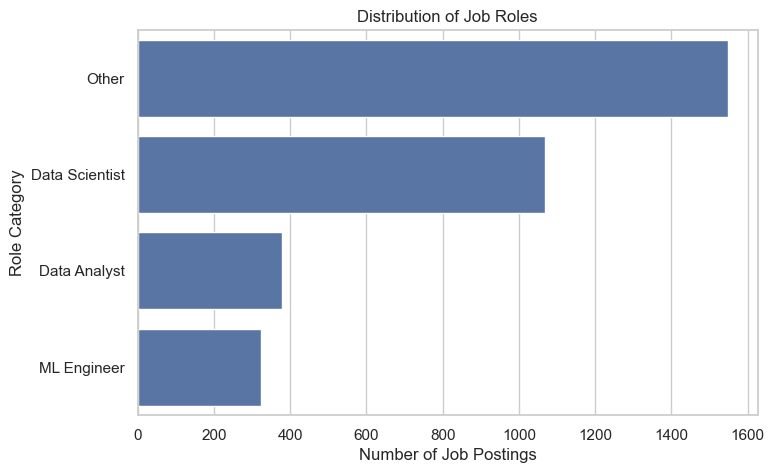

In [110]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df_check,
    y='Role_Category',
    order=df_check['Role_Category'].value_counts().index
)

plt.title("Distribution of Job Roles")
plt.xlabel("Number of Job Postings")
plt.ylabel("Role Category")
plt.show()

Data Scientist roles dominate the job market, followed by Data Analyst and ML Engineer positions, indicating strong and sustained demand for core data roles.

### Job Postings by Job Portal

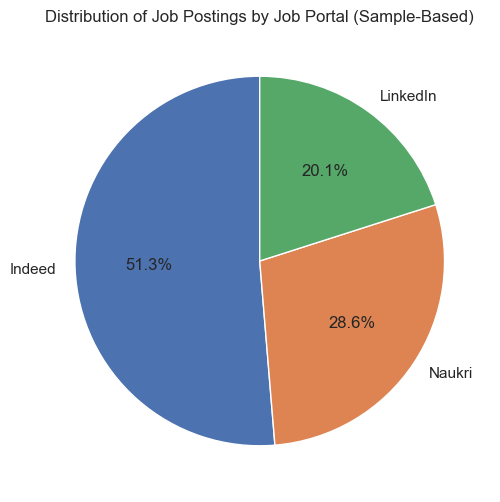

In [111]:
site_counts = df_check['Job_Site_Name'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    site_counts,
    labels=site_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=1)
)

plt.title("Distribution of Job Postings by Job Portal (Sample-Based)")
plt.show()

Job postings are distributed across multiple platforms, reflecting diversified recruitment channels.
Differences in posting volume are influenced by scraping depth and platform structure and are interpreted as indicative rather than absolute.

### Top Locations

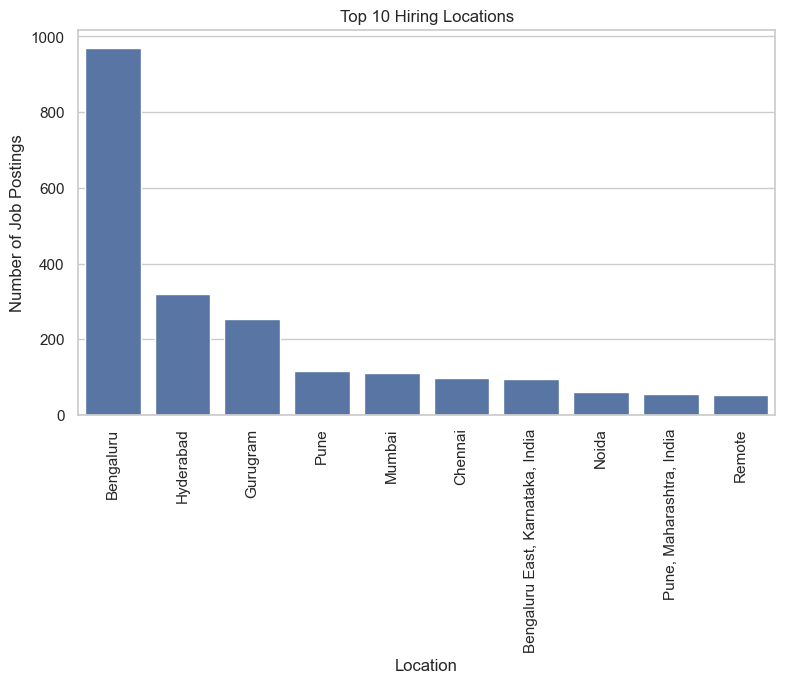

In [113]:
top_locations = (
    df_check[df_check['Location'] != 'Not Mentioned']
    ['Location']
    .value_counts()
    .head(10)
)

plt.figure(figsize=(9,5))
sns.barplot(
    x=top_locations.index,
    y=top_locations.values
)

plt.title("Top 10 Hiring Locations")
plt.xlabel("Location")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=90)
plt.show()

Bengaluru and Hyderabad clearly emerge as the primary hiring hubs for data science roles, reinforcing their dominance as India’s technology centers. Secondary hubs such as Gurugram, Pune, Mumbai, and Chennai show consistent but comparatively lower demand, while the presence of remote roles indicates growing flexibility in hiring practices.

### Experience Distribution

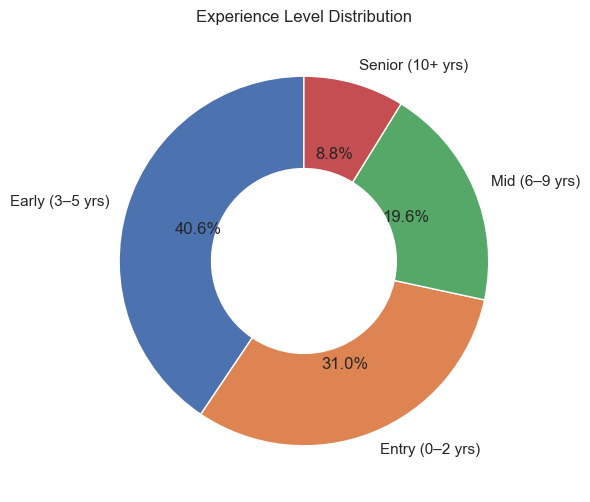

In [116]:
exp_counts = (
    df_check[df_check['Experience_Level'] != 'Not Mentioned']
    ['Experience_Level']
    .value_counts()
)
plt.figure(figsize=(6,6))
plt.pie(
    exp_counts,
    labels=exp_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.5)
)

plt.title("Experience Level Distribution")
plt.show()

Early-career roles dominate the job market, with Entry (0–2 yrs) and Early (3–5 yrs) positions together accounting for the majority of job postings. This indicates strong demand for fresh graduates and early-stage professionals in the data domain. Mid-level (6–9 yrs) roles form a significant share, reflecting steady demand for experienced contributors, while Senior (10+ yrs) roles represent a smaller but critical segment, highlighting selective hiring for leadership and high-expertise positions.

### Salary Disclosure Distribution

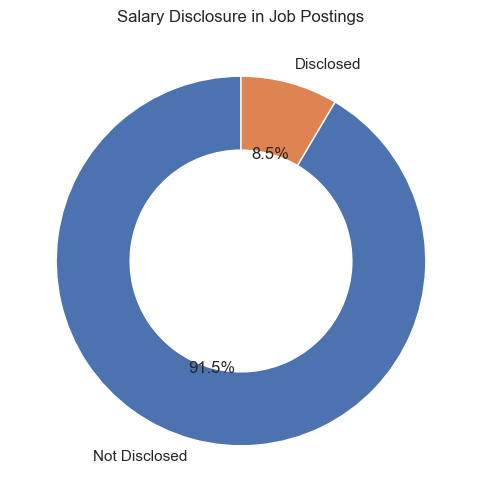

In [117]:
salary_counts = df_check['Salary_Disclosed'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    salary_counts,
    labels=['Not Disclosed', 'Disclosed'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4)
)

plt.title("Salary Disclosure in Job Postings")
plt.show()

The analysis reveals that an overwhelming majority of job postings (over 90%) do not disclose salary information. This indicates low salary transparency across major job portals, making it difficult for job seekers to benchmark compensation and compare opportunities effectively. Only a small fraction of employers openly disclose salary details, suggesting that salary negotiation remains largely opaque in the current job market.

### Top Skills

In [127]:
remove_terms = [
    'data',
    'science',
    'analytical',
    'algorithms'
]

skills_filtered = skills_filtered[
    ~skills_filtered.isin(remove_terms)
]

In [128]:
skill_map = {
    'ai': 'artificial intelligence',
    'data analytics': 'data analysis'
}

skills_filtered = skills_filtered.replace(skill_map)

In [129]:
top_skills = skills_filtered.value_counts().head(10)

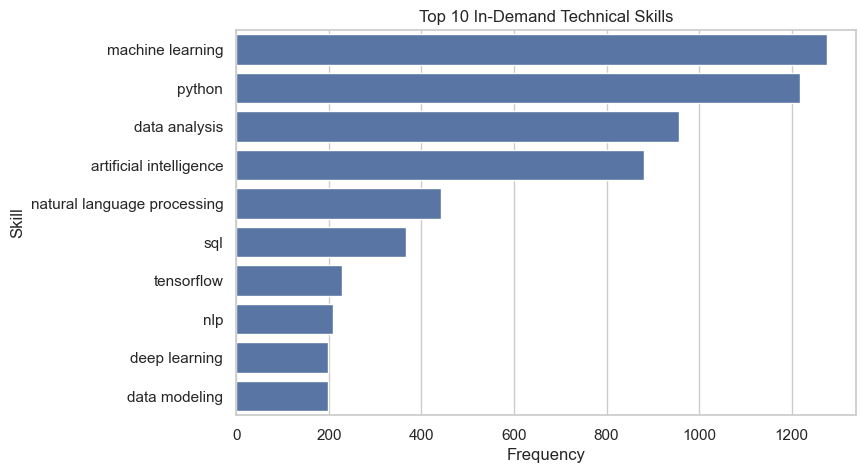

In [130]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=top_skills.values,
    y=top_skills.index
)

plt.title("Top 10 In-Demand Technical Skills")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.show()

Machine Learning and Python are the most in-demand skills, followed by Data Analysis, Artificial Intelligence, SQL, and Natural Language Processing. This highlights strong industry demand for candidates with programming expertise combined with applied analytical and machine learning capabilities.

# Bivariate Analysis

### Role Category × Experience Level

“Which roles are hiring at which experience levels?”

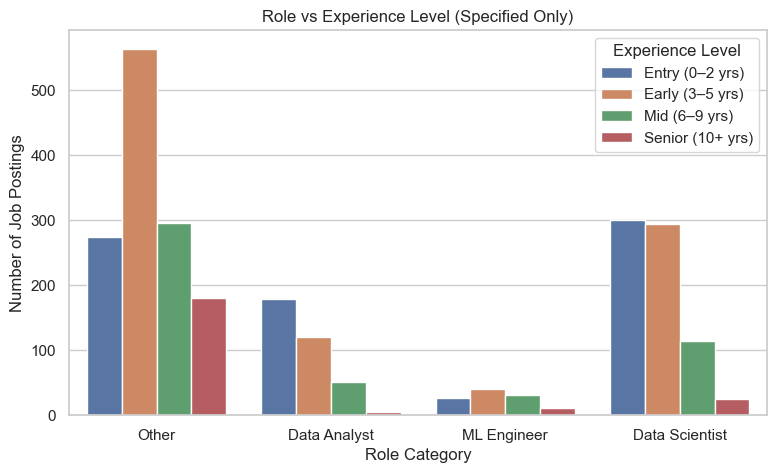

In [137]:
plt.figure(figsize=(9,5))
sns.countplot(data=df_check[df_check['Experience_Level']!='Not Mentioned'],
              x='Role_Category', hue='Experience_Level',
              hue_order=['Entry (0–2 yrs)','Early (3–5 yrs)','Mid (6–9 yrs)','Senior (10+ yrs)'])

plt.title("Role vs Experience Level (Specified Only)")
plt.xlabel("Role Category")
plt.ylabel("Number of Job Postings")
plt.legend(title="Experience Level")
plt.show()


Data Scientist and Data Analyst roles are heavily concentrated at entry and early-career levels, while ML Engineer roles show relatively higher demand at mid and senior experience levels, indicating greater specialization requirements.

### Role × Job Portal

How does the distribution of job roles vary across different job portals?

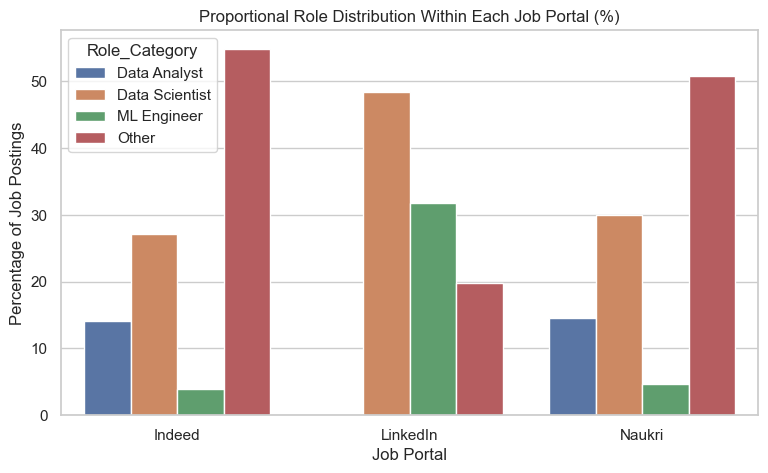

In [139]:
site_role_pct = (
    df_check
    .groupby(['Job_Site_Name', 'Role_Category'])
    .size()
    .reset_index(name='count')
)

site_role_pct['percentage'] = (
    site_role_pct
    .groupby('Job_Site_Name')['count']
    .transform(lambda x: x / x.sum() * 100)
)

plt.figure(figsize=(9,5)) 
sns.barplot(
    data=site_role_pct,
    x='Job_Site_Name',
    y='percentage',
    hue='Role_Category'
)
plt.title('Proportional Role Distribution Within Each Job Portal (%)')
plt.xlabel('Job Portal')
plt.ylabel('Percentage of Job Postings')
plt.show()

LinkedIn is heavily skewed toward Data Scientist and ML Engineer roles, indicating demand for specialized talent, while Indeed and Naukri show a broader mix of roles, reflecting more generalized and mass-market hiring patterns.

### Role × Salary Disclosure

Does salary disclosure vary across different job roles?

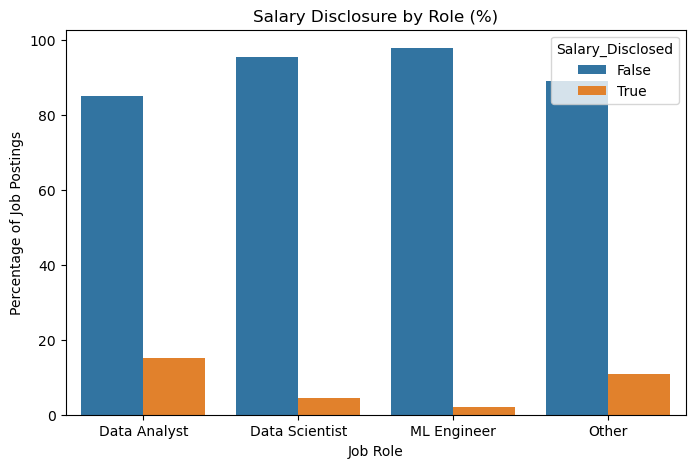

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

role_salary = (
    df_check
    .groupby(['Role_Category', 'Salary_Disclosed'])
    .size()
    .reset_index(name='count')
)

role_salary['percentage'] = (
    role_salary
    .groupby('Role_Category')['count']
    .transform(lambda x: x / x.sum() * 100)
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=role_salary,
    x='Role_Category',
    y='percentage',
    hue='Salary_Disclosed'
)

plt.title('Salary Disclosure by Role (%)')
plt.ylabel('Percentage of Job Postings')
plt.xlabel('Job Role')
plt.show()

Data Analyst roles show relatively higher salary disclosure, while Data Scientist and ML Engineer roles largely avoid salary disclosure, suggesting compensation is more negotiation-driven and role-specific for advanced technical positions.

### Salary Disclosure × Location

Does salary disclosure vary across major job locations in India?

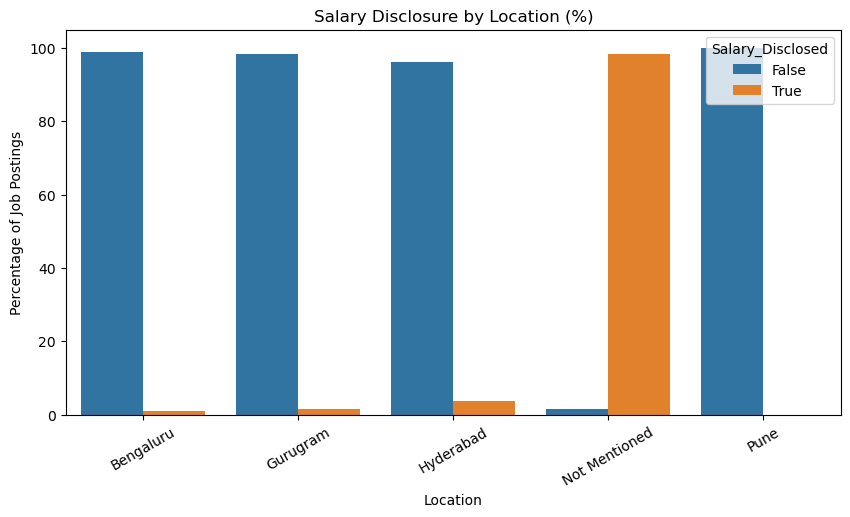

In [12]:
top_locations = df_check['Location'].value_counts().head(5).index

loc_salary = (
    df_check[df_check['Location'].isin(top_locations)]
    .groupby(['Location', 'Salary_Disclosed'])
    .size()
    .groupby(level=0)
    .transform(lambda x: x / x.sum() * 100)
    .reset_index(name='percentage')
)

plt.figure(figsize=(10,5))
sns.barplot(
    data=loc_salary,
    x='Location',
    y='percentage',
    hue='Salary_Disclosed'
)
plt.title('Salary Disclosure by Location (%)')
plt.ylabel('Percentage of Job Postings')
plt.xlabel('Location')
plt.xticks(rotation=30)
plt.show()

Salary disclosure remains low across all major locations, but tech hubs like Bengaluru and Hyderabad show slightly higher transparency, indicating greater market maturity and competition compared to other cities.

### Role × Location

How are different job roles distributed across major hiring locations in India?

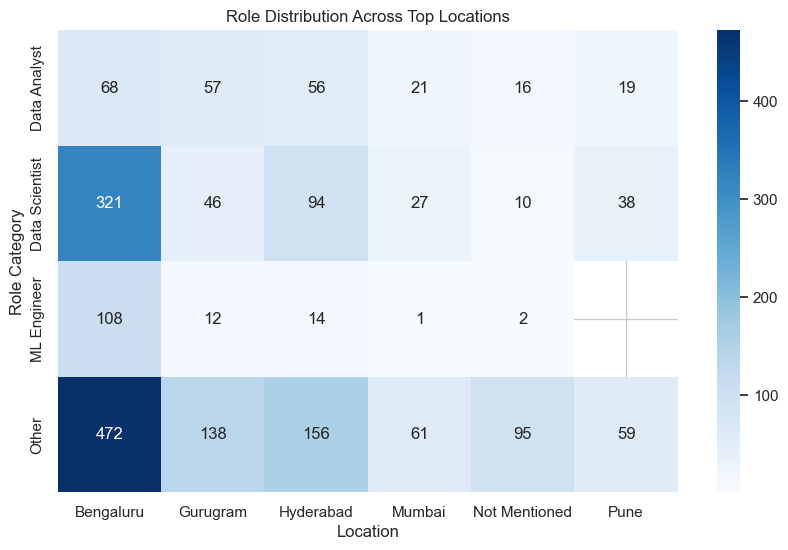

In [142]:
role_loc = (
    df_check
    .groupby(['Role_Category', 'Location'])
    .size()
    .reset_index(name='count')
)

top_locs = df_check['Location'].value_counts().head(6).index
role_loc = role_loc[role_loc['Location'].isin(top_locs)]

pivot_role_loc = role_loc.pivot(
    index='Role_Category',
    columns='Location',
    values='count'
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_role_loc, annot=True, fmt='g', cmap='Blues')
plt.title('Role Distribution Across Top Locations')
plt.xlabel('Location')
plt.ylabel('Role Category')
plt.show()

Data Scientist roles are heavily concentrated in Bengaluru and Hyderabad, confirming their dominance as data hubs, while ML Engineer roles show tighter geographic clustering, indicating specialized hiring ecosystems.

### Job Portal × Salary Disclosure

How does salary disclosure differ across job portals?

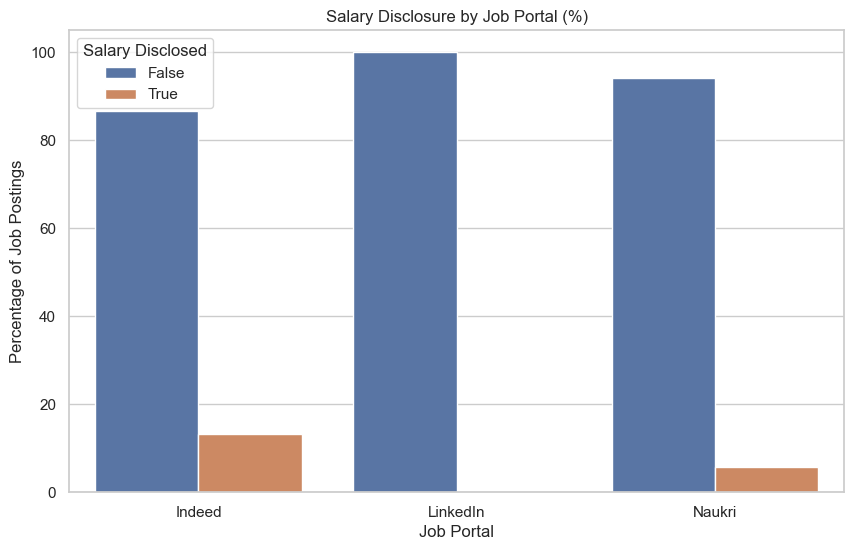

In [143]:
portal_salary = (
    df_check
    .groupby(['Job_Site_Name', 'Salary_Disclosed'])
    .size()
    .reset_index(name='count')
)

portal_salary['percentage'] = (
    portal_salary
    .groupby('Job_Site_Name')['count']
    .transform(lambda x: x / x.sum() * 100)
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=portal_salary,
    x='Job_Site_Name',
    y='percentage',
    hue='Salary_Disclosed'
)

plt.title('Salary Disclosure by Job Portal (%)')
plt.xlabel('Job Portal')
plt.ylabel('Percentage of Job Postings')
plt.legend(title='Salary Disclosed')
plt.show()

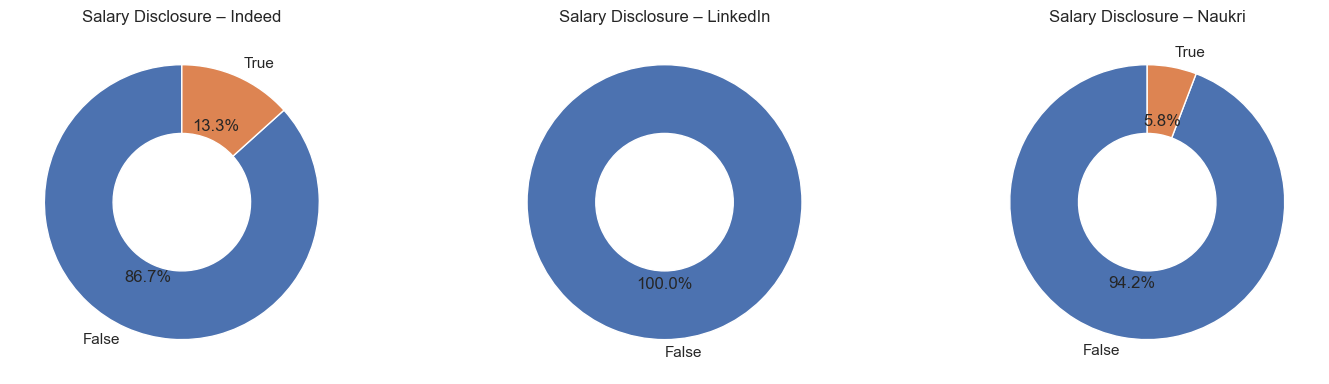

In [347]:
sites = portal_salary['Job_Site_Name'].unique()

fig, axes = plt.subplots(
    nrows=1,
    ncols=len(sites),
    figsize=(5 * len(sites), 4)
)

# If only one site, make axes iterable
if len(sites) == 1:
    axes = [axes]

for ax, site in zip(axes, sites):
    data = portal_salary[portal_salary['Job_Site_Name'] == site]

    ax.pie(
        data['percentage'],
        labels=data['Salary_Disclosed'],
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'width': 0.5}
    )

    ax.set_title(f'Salary Disclosure – {site}')

plt.tight_layout()
plt.show()

Salary disclosure is consistently low across all job portals, with LinkedIn showing almost no disclosure due to platform limitations, while Indeed and Naukri reveal salaries in only a small fraction of postings, highlighting a negotiation-driven compensation culture.

### Experience Level × Salary Disclosure

Does salary disclosure vary across different experience levels in data science job postings?

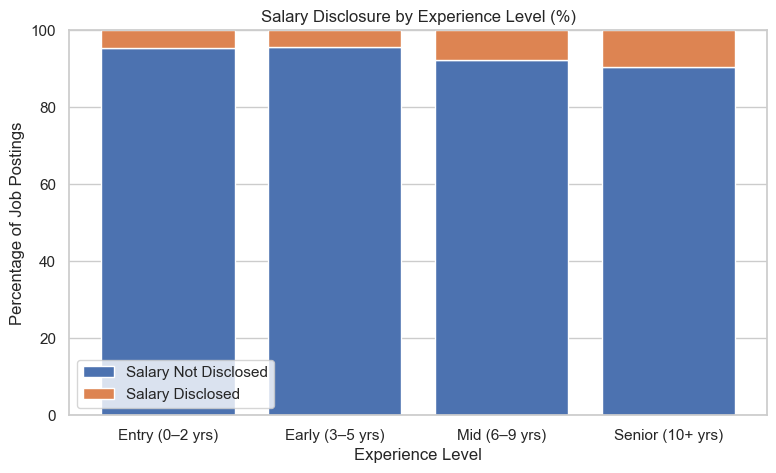

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

exp_salary = (
    df_check[df_check['Experience_Level'] != 'Unknown']
    .groupby(['Experience_Level', 'Salary_Disclosed'])
    .size()
    .unstack(fill_value=0)
)

# Convert counts to percentages
exp_salary_pct = exp_salary.div(exp_salary.sum(axis=1), axis=0) * 100

# Ensure logical experience order
order = ['Entry (0–2 yrs)', 'Early (3–5 yrs)', 'Mid (6–9 yrs)', 'Senior (10+ yrs)']
exp_salary_pct = exp_salary_pct.loc[order]

plt.figure(figsize=(9, 5))

plt.bar(
    exp_salary_pct.index,
    exp_salary_pct[False],
    label='Salary Not Disclosed'
)

plt.bar(
    exp_salary_pct.index,
    exp_salary_pct[True],
    bottom=exp_salary_pct[False],
    label='Salary Disclosed'
)

plt.title('Salary Disclosure by Experience Level (%)')
plt.xlabel('Experience Level')
plt.ylabel('Percentage of Job Postings')
plt.legend()
plt.ylim(0, 100)

plt.show()

Salary disclosure is relatively higher for entry-level and early-career roles, while mid and senior positions are overwhelmingly undisclosed, indicating negotiation-driven compensation for experienced professionals.

# Multivaraite Analysis

## Role × Experience × Salary Disclosure

How does salary disclosure vary across job roles and experience levels?

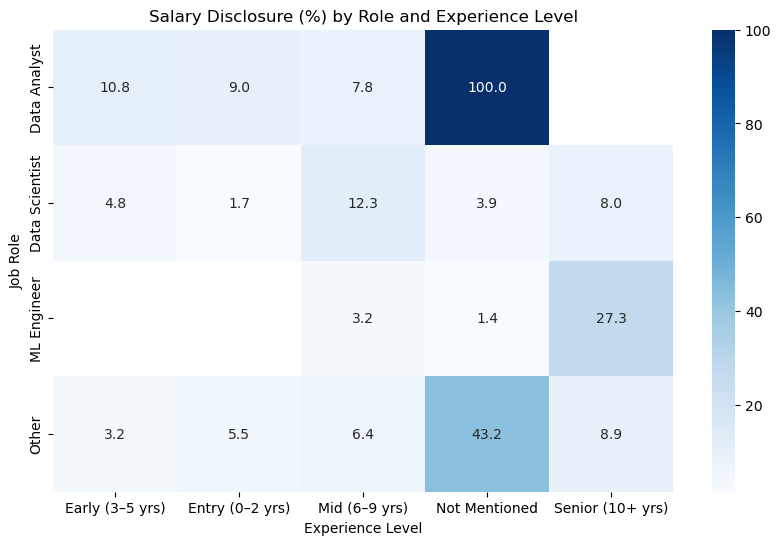

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create percentage table
multi_table = (
    df_check
    .groupby(['Role_Category', 'Experience_Level', 'Salary_Disclosed'])
    .size()
    .reset_index(name='count')
)

# Convert to percentage within Role + Experience
multi_table['percentage'] = (
    multi_table
    .groupby(['Role_Category', 'Experience_Level'])['count']
    .transform(lambda x: x / x.sum() * 100)
)

# Keep only Salary Disclosed = True
heatmap_data = multi_table[multi_table['Salary_Disclosed'] == True]

# Pivot for heatmap
pivot_table = heatmap_data.pivot_table(
    index='Role_Category',
    columns='Experience_Level',
    values='percentage'
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".1f",
    cmap="Blues"
)
plt.title("Salary Disclosure (%) by Role and Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Job Role")
plt.show()


# Hypothesis Testing

In [358]:
# Why hypothesis testing comes AFTER visualization?

# Visualizations show patterns that appear true.

# Hypothesis testing checks whether those patterns are statistically real.

# This prevents drawing conclusions based only on visual bias.

### Hypothesis - 1

Salary disclosure depends on job role

**Business question**

Does salary disclosure differ across job roles?

**Hypotheses**

**H₀ (Null Hypothesis):**

Salary disclosure is independent of job role.

**H₁ (Alternative Hypothesis):**

Salary disclosure varies significantly by job role.

In [156]:
from scipy.stats import chi2_contingency

contingency_role_salary = pd.crosstab(
    df_check['Role_Category'],
    df_check['Salary_Disclosed']
)

chi2, p_value, dof, expected = chi2_contingency(contingency_role_salary)

print("Chi-square:", chi2)
print("p value:", p_value)


Chi-square: 72.03879225272368
p value: 1.5617306228544353e-15


In [157]:
alpha = 0.05

if p_value < alpha:
    print("Reject H₀ → Salary disclosure depends on job role")
else:
    print("Fail to reject H₀ → No significant relationship")


Reject H₀ → Salary disclosure depends on job role


Salary disclosure varies significantly across job roles. Entry-level and Data Analyst positions disclose salary more frequently, 
while Data Scientist and ML Engineer roles predominantly hide compensation, 
indicating negotiation-driven and senior-focused hiring practices for specialized roles.

### Hypothesis 2:

Skill Demand Depends on Job Role

**Business Question**

Do different job roles demand different skill sets?

**Hypotheses**

**H₀ (Null Hypothesis):**

Skill demand is independent of job role.

**H₁ (Alternative Hypothesis):**

Skill demand varies significantly by job role.

In [158]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create binary column for Python skill
df_check['Has_Python'] = df_check['Skills'].str.contains(
    'python', case=False, na=False
)

# Contingency table: Role vs Python skill
contingency_role_skill = pd.crosstab(
    df_check['Role_Category'],
    df_check['Has_Python']
)

# Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_role_skill)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)

# Decision rule
alpha = 0.05
if p_value < alpha:
    print("Reject H₀ → Skill demand depends on job role")
else:
    print("Fail to reject H₀ → No significant relationship")


Chi-square statistic: 112.78378781740324
p-value: 2.761695429267213e-24
Degrees of freedom: 3
Reject H₀ → Skill demand depends on job role


Python demand varies significantly across job roles, with Data Scientist and ML Engineer positions showing much higher Python requirements than Data Analyst roles, confirming that skill expectations are role-specific rather than uniform across the data job market.

### Hypothesis 3: 

Salary Disclosure Depends on Experience Level

**Business Question**

Are companies less likely to disclose salary for senior-level roles compared to junior roles?

**Hypotheses**

**H₀ (Null Hypothesis):**

Salary disclosure is independent of experience level.

**H₁ (Alternative Hypothesis):**

Salary disclosure varies significantly by experience level.

In [160]:
df_check['Experience_Level'].value_counts()

Experience_Level
Early (3–5 yrs)     1018
Not Mentioned        810
Entry (0–2 yrs)      779
Mid (6–9 yrs)        491
Senior (10+ yrs)     221
Name: count, dtype: int64

In [161]:
contingency_exp_salary = pd.crosstab(
    df_check['Experience_Level'],
    df_check['Salary_Disclosed']
)

contingency_exp_salary

Salary_Disclosed,False,True
Experience_Level,,
Early (3–5 yrs),973,45
Entry (0–2 yrs),743,36
Mid (6–9 yrs),453,38
Not Mentioned,668,142
Senior (10+ yrs),200,21


In [162]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency_exp_salary)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)

Chi-square statistic: 122.4866438337628
p-value: 1.572012521201416e-25
Degrees of freedom: 4


In [163]:
alpha = 0.05

if p_value < alpha:
    print("Reject H₀ → Salary disclosure depends on experience level")
else:
    print("Fail to reject H₀ → No significant relationship")

Reject H₀ → Salary disclosure depends on experience level


Salary transparency decreases as experience level increases.

Entry-level and early-career roles disclose salaries more frequently, while senior roles are largely undisclosed, indicating negotiation-driven and candidate-specific compensation at higher experience levels.

### Statistical testing confirms that job role, skills, experience, and location materially influence hiring transparency and demand patterns in the data science job market.

# Conclusion

This project analyzed real-time data science job postings collected from multiple job portals to understand hiring trends in the Indian job market.

The results show a strongly demand-driven market, with the highest concentration of openings for Data Scientist, Data Analyst, and ML Engineer roles. Python, machine learning, and data analytics consistently emerge as the most in-demand skills across roles.

Hiring is skewed toward entry-level and early-career professionals, while senior roles are fewer and more selective. Salary information is rarely disclosed, particularly for senior and specialized positions, indicating negotiation-based compensation practices.

Statistical testing confirms that job role, skill requirements, experience level, and location significantly influence hiring demand and salary transparency.

Overall, the data science job market in India is active, competitive, and skill-focused, with clear structural patterns across roles, experience levels, locations, and job portals.

# Business Recommendations

**For Job Seekers**

Prioritize Python, Machine Learning, SQL, and core data analytics skills, as these appear most consistently across job postings.

Entry-level and early-career roles dominate the market, making analyst and junior data science positions the most accessible entry points.

Do not rely on posted salaries. Be prepared for negotiation, especially for senior or specialized roles where salary disclosure is rare.

**For Employers**

Disclosing salary ranges can improve applicant quality and reduce mismatched applications, particularly for mid-level roles.

Clearly specifying required skills helps attract role-aligned candidates and reduces noise from generic applicants.

Hiring demand varies by location, suggesting value in city-specific recruitment strategies rather than uniform national postings.

**For Recruiters & Platforms**

Different platforms attract different role types, indicating the need for platform-specific posting strategies.

Standardizing job titles and skill tags can significantly improve search relevance and candidate-job matching.

Enhancing salary and skill metadata would increase transparency and platform credibility.

## 🎯 Final Takeaway

Ramesh is a non-IT professional trying to enter the data science field.  
By looking at individual job portals, he faced confusion.  
This project replaces assumptions with evidence.

- **Which roles are actually in demand?**  
  → Data Scientist and Data Analyst roles have the highest demand across portals.

- **Is the market entry-level friendly?**  
  → Yes. Most postings target entry and early-career professionals.

- **Which skills should he learn first?**  
  → Python, Machine Learning, SQL, and Data Analytics are non-negotiable.

- **Which cities offer more opportunities?**  
  → Bengaluru and Hyderabad dominate data science hiring.

- **Can he rely on salary information?**  
  → No. Most companies do not disclose salary, especially for senior roles.

- **Does one job portal show the full picture?**  
  → No. Each portal highlights different hiring patterns.